# G3D Fitting

In [1]:
from fitPRd import *
import matplotlib.pyplot as plt
from analysis import aesthetic_plot, iso_in_plots
from scipy.special import gamma

a1, b1, c1, n1 = sp.symbols('a1 b1 c1 n1')
a2, b2, c2, n2 = sp.symbols('a2 b2 c2 n2')
a3, b3, c3, n3 = sp.symbols('a3 b3 c3 n3')
a4, b4, c4, n4 = sp.symbols('a4 b4 c4 n4')


## Test no-histogram method

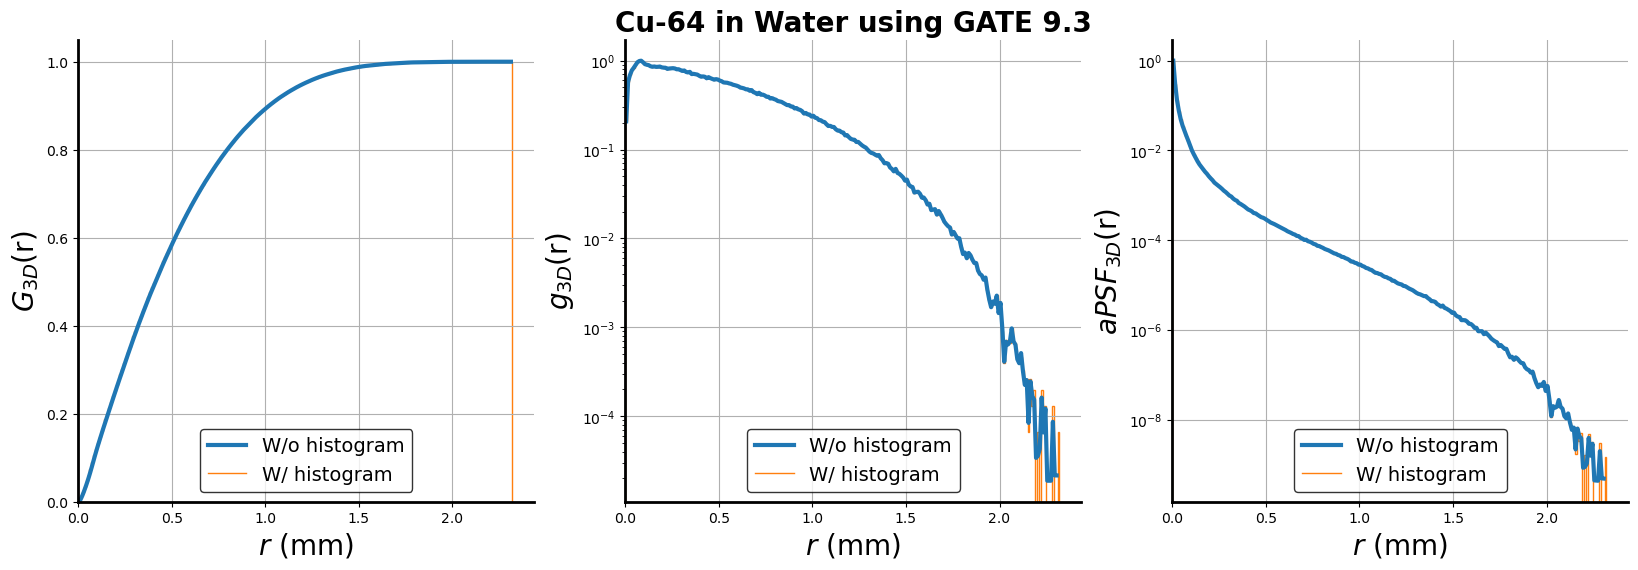

In [2]:
material = "Water"
code, coden = "GATE93", "GATE 9.3"
isotope = "Cu64"
input_file = f"RESULTS/SPC/{material}/{code}_xyz/{isotope}.dat" # in cm

# using histograms
bs = 1e-3      # <<---<< the lower the better (in cm)
hr, h_g3D = load_histo_g3D(input_file, bs)
hr, h_aPSF3D = load_histo_aPSF3D(input_file, bs)
hr, h_G3D = load_histo_G3D(input_file, bs)

# without histograms
nhr, nh_G3D = load_nonhisto_G3D(input_file)
nhrp, nh_g3D = load_nonhisto_g3D(input_file, bs)
nhrp, nh_aPSF3D = load_nonhisto_aPSF3D(input_file, bs)

step = np.arange(0, nhr[-1] + bs, bs)
# Plots
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.plot(nhr*10, nh_G3D, label='W/o histogram')
plt.stairs(h_G3D, step*10, label='W/ histogram')
plt.xlabel(r'$r$ (mm)')
plt.ylabel(r'$G_{3D}$(r)')
plt.xlim(0, None)
ax, leg = aesthetic_plot(legend_size=14, linewidth=3)
leg.set_loc('lower center')


plt.subplot(1,3,2)
plt.plot(nhrp*10, nh_g3D, label='W/o histogram')
plt.stairs(h_g3D, step*10, label='W/ histogram')
plt.xlabel(r'$r$ (mm)')
plt.ylabel(r'$g_{3D}$(r)')
plt.yscale('log')
plt.title(f'{iso_in_plots(isotope)} in {material} using {coden}')
plt.xlim(0, None)
ax, leg = aesthetic_plot(legend_size=14, linewidth=3)
leg.set_loc('lower center')

plt.subplot(1,3,3)
plt.plot(nhrp*10, nh_aPSF3D, label='W/o histogram')
plt.stairs(h_aPSF3D, step*10, label='W/ histogram')
plt.xlabel(r'$r$ (mm)')
plt.ylabel(r'$aPSF_{3D}$(r)')
plt.yscale('log')
plt.xlim(0, None)
ax, leg = aesthetic_plot(legend_size=14, linewidth=3)
leg.set_loc('lower center')


plt.show()

## Test fitting method using lmfit

[[Model]]
    Model(model_func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 365
    # data points      = 1000000
    # variables        = 12
    chi-square         = 4.64454187
    reduced chi-square = 4.6446e-06
    Akaike info crit   = -12279793.8
    Bayesian info crit = -12279652.0
    R-squared          = 0.99994427
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a1:  7.20820395 (init = 1)
    b1:  20.1325812 (init = 1)
    c1:  25.0000173 (init = 1)
    n1:  1.96435337 (init = 1)
    a2:  0.49295099 (init = 1)
    b2:  0.02482836 (init = 1)
    c2:  0.00510323 (init = 1)
    n2:  1.54591452 (init = 1)
    a3:  0.18707314 (init = 1)
    b3:  0.17811206 (init = 1)
    c3:  5.5247e-08 (init = 1)
    n3:  1.73289007 (init = 1)


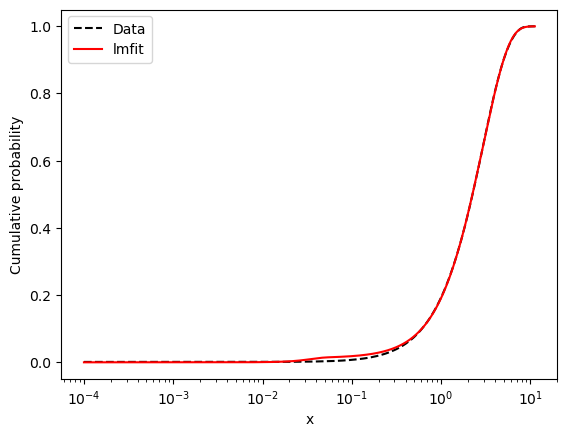

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, Parameters

# Define the model function
def model_func(x, a1, b1, c1, n1, a2, b2, c2, n2, a3, b3, c3, n3):
    f1 = (a1*x)**n1 + (b1*x)**2.5 + (c1*x)**3.5
    f2 = (a2*x)**n2 + (b2*x)**2.5 + (c2*x)**3.5
    f3 = (a3*x)**n3 + (b3*x)**2.5 + (c3*x)**3.5
    return 1 - 1.30e-2*np.exp(-f1) - 51.93e-2*np.exp(-f2) - 46.89e-2*np.exp(-f3)

# Create a Model instance
mod = Model(model_func)

# Create parameters with initial guesses and bounds
params = Parameters()
params.add('a1', value=1.0, min=0, max=None)
params.add('b1', value=1.0, min=0, max=None)
params.add('c1', value=1.0, min=0, max=None)
params.add('n1', value=1.0, min=1, max=2)
params.add('a2', value=1.0, min=0, max=None)
params.add('b2', value=1.0, min=0, max=None)
params.add('c2', value=1.0, min=0, max=None)
params.add('n2', value=1.0, min=1, max=2)
params.add('a3', value=1.0, min=0, max=None)
params.add('b3', value=1.0, min=0, max=None)
params.add('c3', value=1.0, min=0, max=None)
params.add('n3', value=1.0, min=1, max=2)

# Get data
material = "Water"
cfolder = "PenEasy2024_xyz"
ffolder = "SPC" # SPC for Coulomb effect, noCoulomb for no Coulomb effect
isotope = "I124"

# Load sample
input_file = f"RESULTS/{ffolder}/{material}/{cfolder}/{isotope}.dat" # in cm
sample_r, sample_G3D = load_nonhisto_G3D(input_file)
sample_r *= 10

# Assume xdata and ydata are defined as before.
result = mod.fit(sample_G3D, params, x=sample_r)
print(result.fit_report())

# Plot the result
plt.figure()
plt.plot(sample_r, sample_G3D, 'k--', label='Data')
plt.plot(sample_r, result.best_fit, 'r-', label='lmfit')
plt.xlabel('x')
plt.ylabel('Cumulative probability')
plt.xscale('log')
plt.legend()
plt.show()


# Apply G3DF to all results

### single-branch isotopes

1 - exp(-(a1*x)**n1 - (b1*x)**2.5 - (c1*x)**3.5)
**********-PHITS_xyz-**********
Water - C11         	n1=1.0717	chi2=9.4	(0.32%)	final_params={a1: 0.827, b1: 0.493, c1: 0.002, n1: 1.001}
Water - N13         	n1=1.0600	chi2=6.6	(0.26%)	final_params={a1: 0.559, b1: 0.379, c1: 0.097, n1: 1.029}
Water - O15         	n1=1.0522	chi2=11.3	(0.34%)	final_params={a1: 0.312, b1: 0.233, c1: 0.121, n1: 1.106}
Water - F18         	n1=1.0000	chi2=2.3	(0.16%)	final_params={a1: 1.718, b1: 0.718, c1: 0.563, n1: 1.001}
Water - Cu64        	n1=1.2321	chi2=2.8	(0.17%)	final_params={a1: 1.577, b1: 0.0, c1: 0.659, n1: 1.234}
Lung - C11          	n1=1.0717	chi2=15.9	(0.40%)	final_params={a1: 0.247, b1: 0.141, c1: 0.076, n1: 1.001}
Lung - F18          	n1=1.0000	chi2=5.3	(0.23%)	final_params={a1: 0.51, b1: 0.211, c1: 0.17, n1: 1.001}
Bone - C11          	n1=1.0717	chi2=3.8	(0.20%)	final_params={a1: 1.201, b1: 0.685, c1: 0.27, n1: 1.001}
Bone - F18          	n1=1.0000	chi2=1.0	(0.11%)	final_params={a1: 2.47, b1

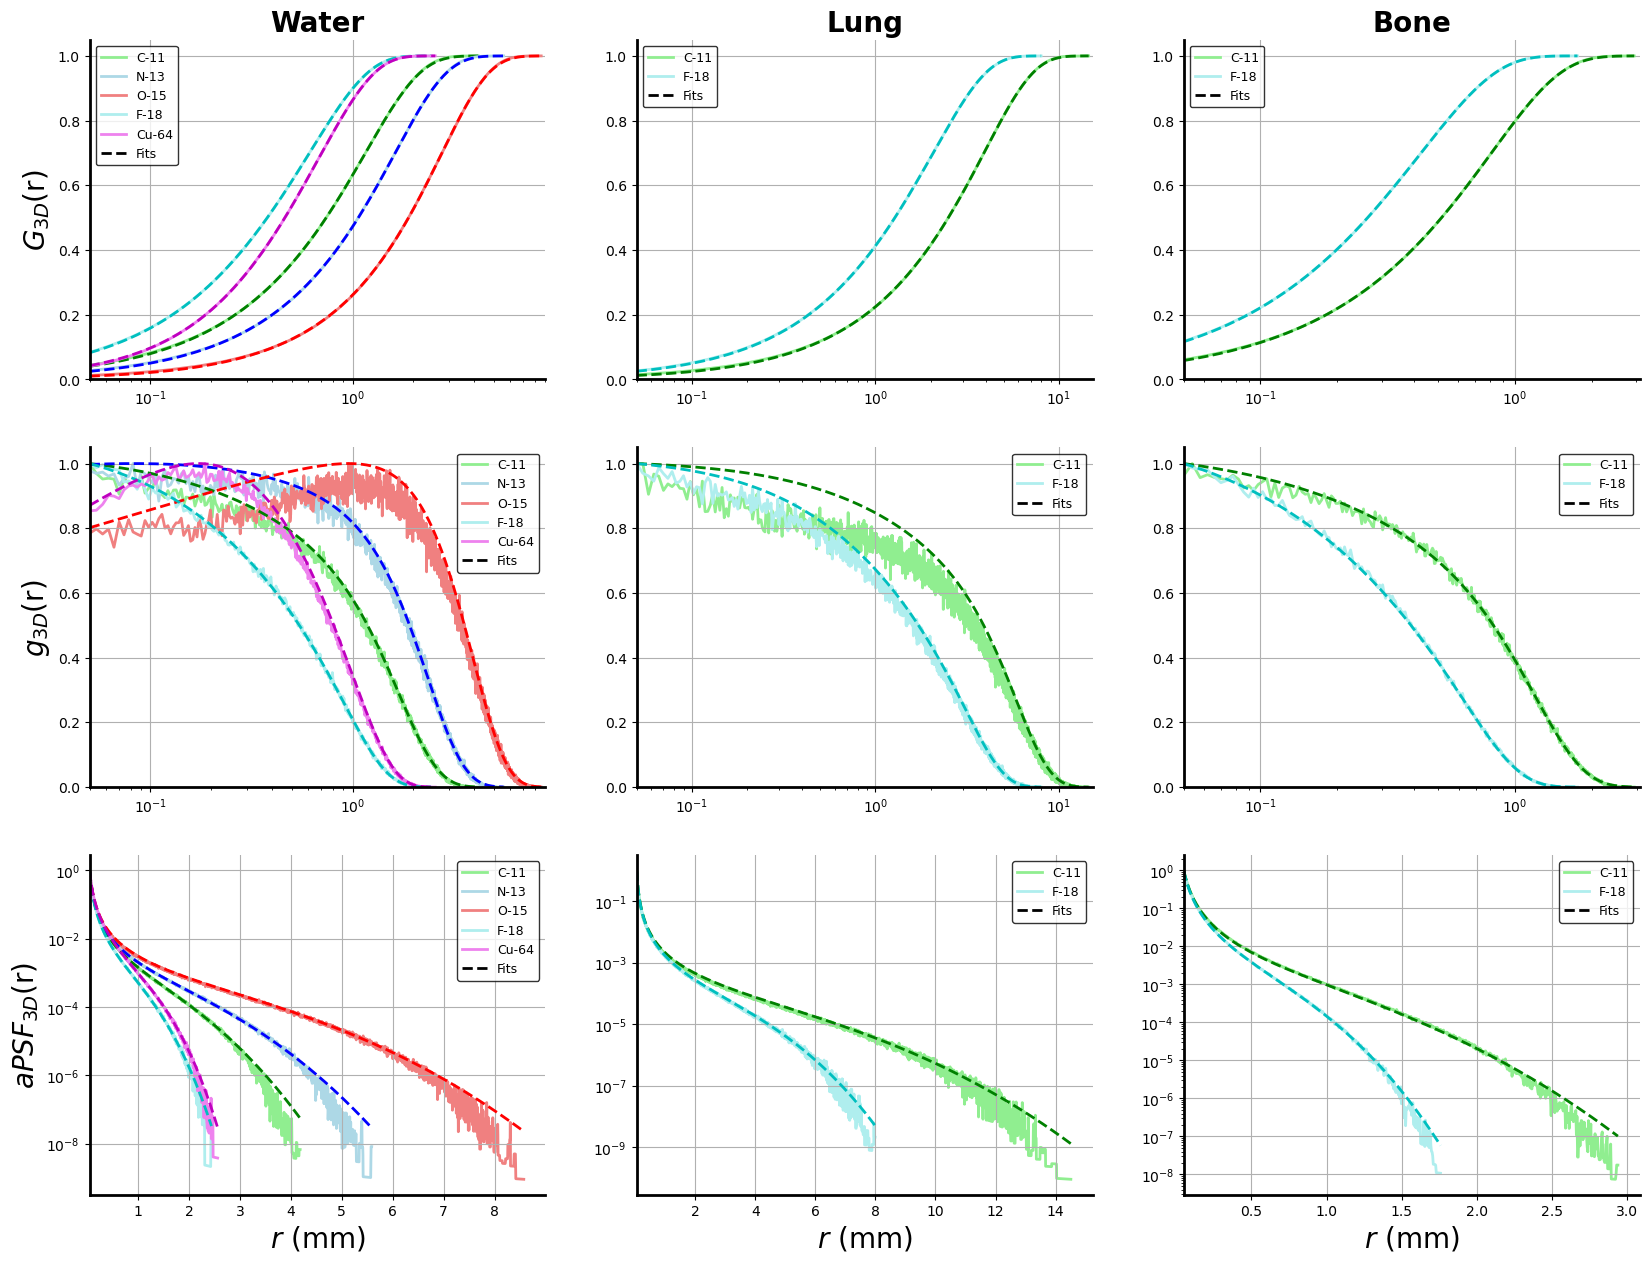

**********-PenEasy2024_xyz-**********
Water - C11         	n1=1.0717	chi2=2.4	(0.16%)	final_params={a1: 0.777, b1: 0.468, c1: 0.217, n1: 1.01}
Water - N13         	n1=1.0600	chi2=2.0	(0.14%)	final_params={a1: 0.537, b1: 0.347, c1: 0.193, n1: 1.05}
Water - O15         	n1=1.0522	chi2=7.0	(0.27%)	final_params={a1: 0.295, b1: 0.221, c1: 0.133, n1: 1.118}
Water - F18         	n1=1.0000	chi2=0.1	(0.03%)	final_params={a1: 1.612, b1: 0.703, c1: 0.526, n1: 1.011}
Water - Cu64        	n1=1.2321	chi2=9.3	(0.31%)	final_params={a1: 1.494, b1: 0.0, c1: 0.631, n1: 1.251}
Lung - C11          	n1=1.0717	chi2=2.6	(0.16%)	final_params={a1: 0.232, b1: 0.139, c1: 0.068, n1: 1.01}
Lung - F18          	n1=1.0000	chi2=0.7	(0.08%)	final_params={a1: 0.479, b1: 0.211, c1: 0.152, n1: 1.012}
Bone - C11          	n1=1.0717	chi2=0.7	(0.09%)	final_params={a1: 1.131, b1: 0.635, c1: 0.331, n1: 1.013}
Bone - F18          	n1=1.0000	chi2=0.2	(0.04%)	final_params={a1: 2.308, b1: 1.015, c1: 0.639, n1: 1.014}


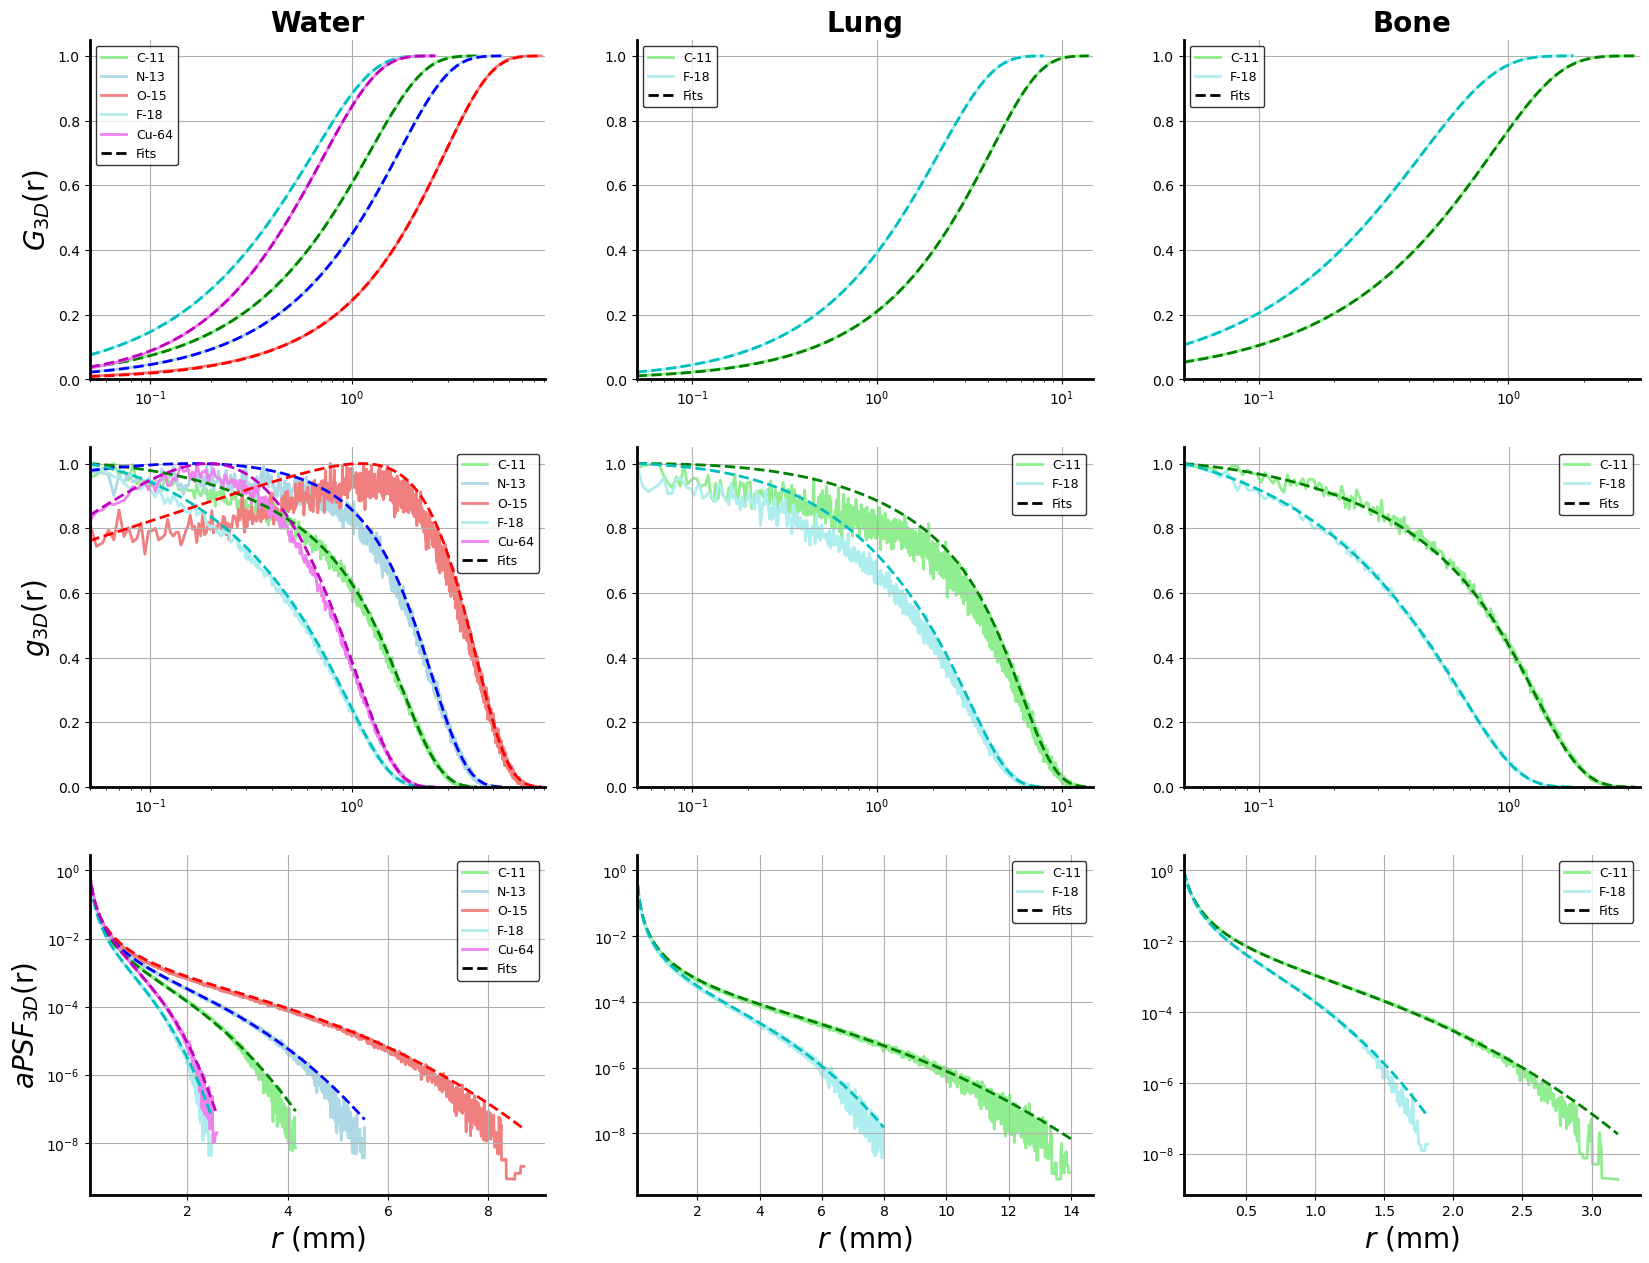

**********-GATE93_xyz-**********
Water - C11         	n1=1.0717	chi2=25.5	(0.52%)	final_params={a1: 0.956, b1: 0.364, c1: 0.419, n1: 1.001}
Water - N13         	n1=1.0600	chi2=6.1	(0.25%)	final_params={a1: 0.603, b1: 0.36, c1: 0.265, n1: 1.001}
Water - O15         	n1=1.0522	chi2=1.7	(0.13%)	final_params={a1: 0.293, b1: 0.278, c1: 0.095, n1: 1.022}
Water - F18         	n1=1.0000	chi2=10.5	(0.34%)	final_params={a1: 2.045, b1: 0.257, c1: 0.817, n1: 1.001}
Water - Cu64        	n1=1.2321	chi2=28.2	(0.54%)	final_params={a1: 1.745, b1: 0.0, c1: 0.712, n1: 1.179}
Lung - C11          	n1=1.0717	chi2=62.6	(0.80%)	final_params={a1: 0.261, b1: 0.17, c1: 0.009, n1: 1.001}
Lung - F18          	n1=1.0000	chi2=49.8	(0.72%)	final_params={a1: 0.561, b1: 0.15, c1: 0.252, n1: 1.001}
Bone - C11          	n1=1.0717	chi2=12.6	(0.37%)	final_params={a1: 1.446, b1: 0.512, c1: 0.595, n1: 1.001}
Bone - F18          	n1=1.0000	chi2=10.5	(0.35%)	final_params={a1: 3.086, b1: 0.611, c1: 1.121, n1: 1.001}


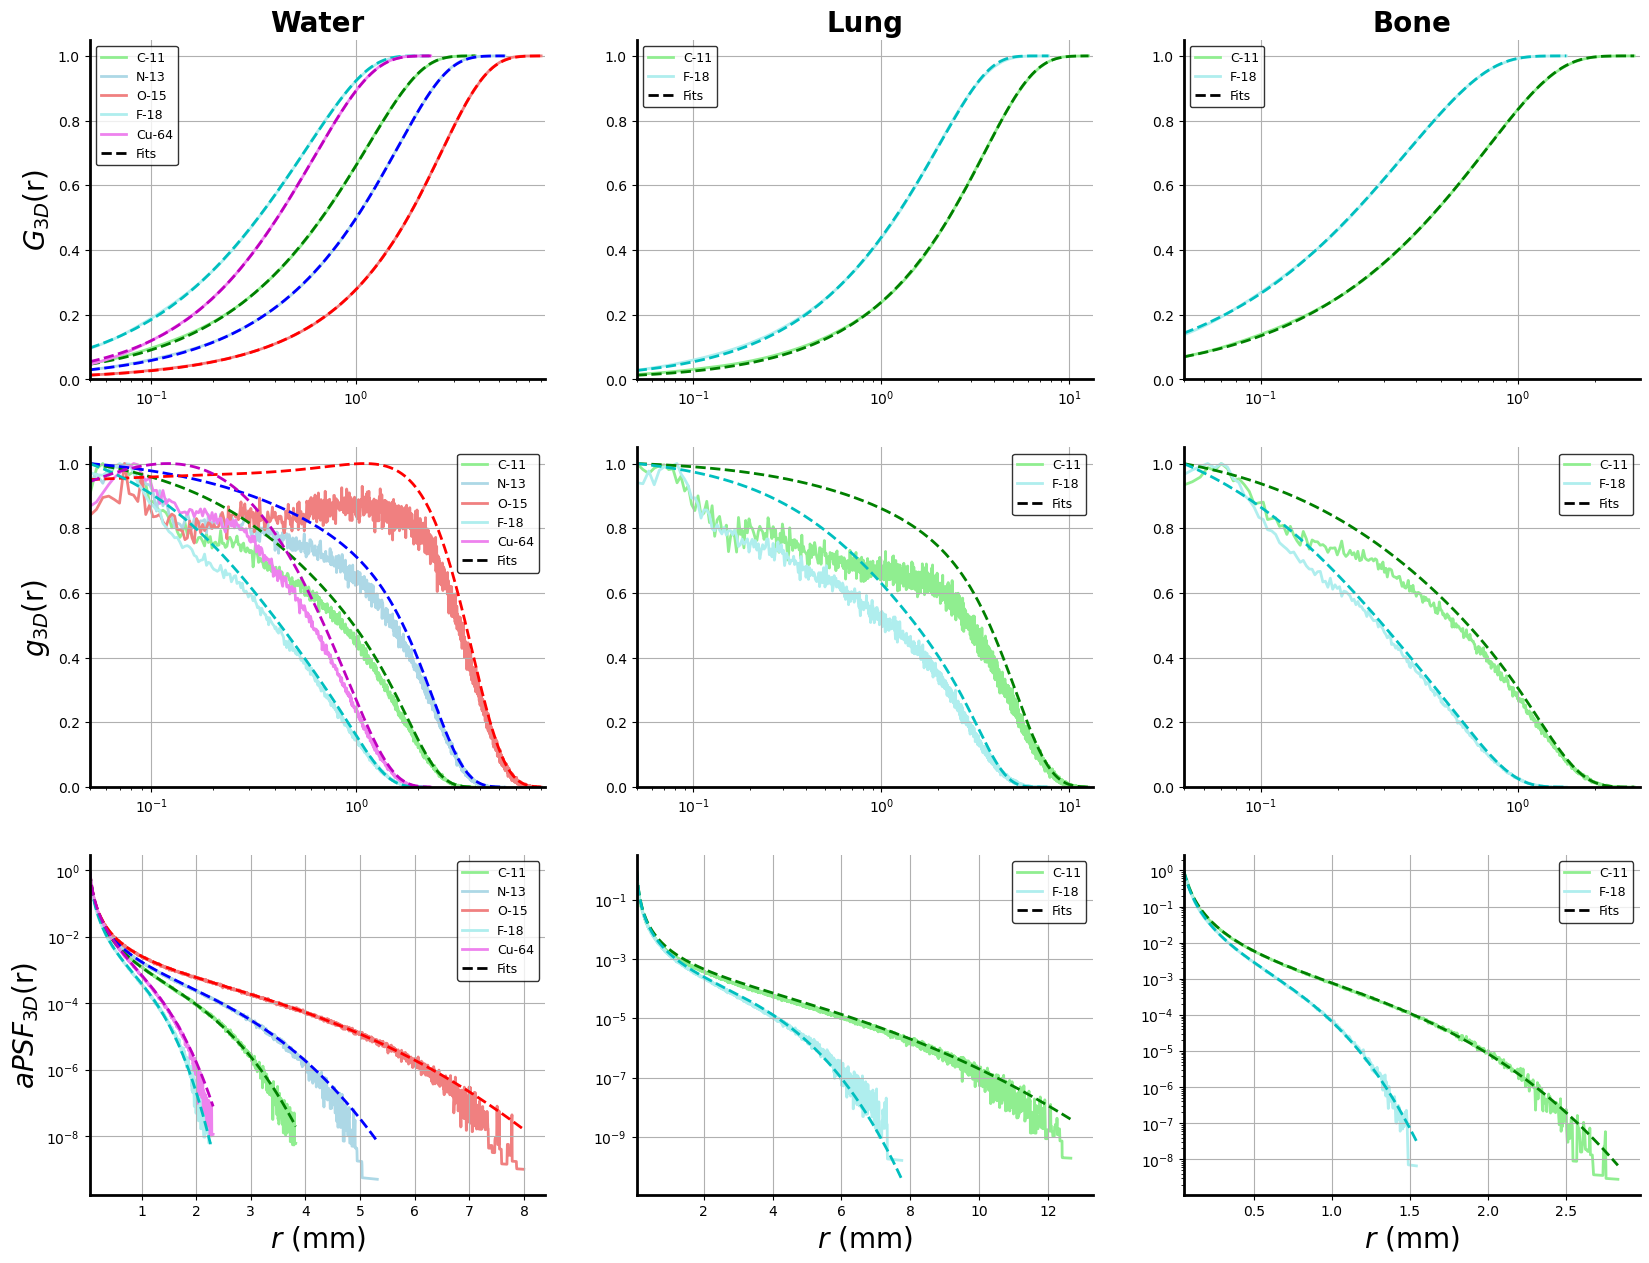

In [ ]:
def Q_values(iso):
    match iso:
        case "C11": Q = 1.982   # MeV
        case "N13": Q = 2.220
        case "O15": Q = 2.754
        case "F18": Q = 1.655
        case "Cu64": Q = 1.674
        case _: Q = None
    return Q

def NZA_values(iso):
    match iso:
        case "C11":  Z, A = 6, 11
        case "N13":  Z, A = 7, 13
        case "O15":  Z, A = 8, 15
        case "F18":  Z, A = 9, 18
        case "Cu64": Z, A = 29, 64
    N = A - Z
    return N, Z, A

def Emean_values(iso):
    match iso:
        case "C11":  Em = 0.385
        case "N13":  Em = 0.492
        case "O15":  Em = 0.735
        case "F18":  Em = 0.250
        case "Cu64": Em = 0.278
        case _: Em = None
    return Em

def halflife_values(iso):
    match iso:
        case "C11":   hl = 20.3 * 60  # Convert minutes to seconds
        case "N13":   hl = 9.97 * 60   # Convert minutes to seconds
        case "O15":   hl = 2.03 * 60   # Convert minutes to seconds
        case "F18":   hl = 109.8 * 60  # Convert minutes to seconds
        case "Cu64":  hl = 12.7 * 3600 # Convert hours to seconds
        case _: hl = None
    return hl

def Fermi_factor(Z, E):
    """
    Calculate the Fermi function for beta spectrum correction
    
    Parameters:
    Z (int): Atomic number of daughter nucleus
    E (float): Kinetic energy of beta particle in MeV
    
    Returns:
    float: Fermi function value F(Z,E)
    """
    N, Z, A = NZA_values(iso)
    # Constants
    alpha = 1 / 137.035999084
    hc = 197.3269804  # MeV·fm
    m = 0.51099895    # electron rest mass (MeV)

    # Determine particle momentum and beta
    W = E + m
    p = np.sqrt(W**2 - m**2)
    beta = p / W

    # Sommerfeld parameter
    eta = -Z * alpha / beta

    # Relativistic correction (S)
    S = np.sqrt(1 - (alpha * Z)**2)

    # Nuclear radius (fm)
    abplus = -1.9 + 1.96*Z + 0.0079*Z**2 - 0.00002*Z**3
    R = (1.123*abplus**(1/3)-0.941/abplus**(1/3))/hc

    # Gove-Martin approximation
    gamma_term = abs(gamma(S + 1j * eta))**2
    exponential_term = np.exp(np.pi * eta)
    prefactor = (2 * (1 + S)) / (gamma(1 + 2 * S)**2)
    radial_term = (2 * p * R / hc)**(2 * S - 2)

    # Final Fermi function
    F = prefactor * radial_term * exponential_term * gamma_term
    return F

def coulomb_effect(iso):
    N, Z, A = NZA_values(iso)
    # return [max(N/Z, N/Z + (N-Z)/(N+Z))]

    Q = Q_values(iso)
    Em = Emean_values(iso)
    ee = np.linspace(1e-10, Em, 100)
    ff = Fermi_factor(iso, ee)
    nc = (N-Z)**2/A * np.mean(ff)
    return [1+nc]
    # Qa = 23.7*(N-Z+1)/A
    # Qp = 11.2/A**0.5 if (Z%2 == N%2) else 0
    # Qc = 0.691 / A**(1/3) * (Z*(Z-1) - (Z-1)*(Z-2))
    # Qp = Q + Qa - Qc
    # print(f"{iso}: {Q=}, {Qa=}, {Qp=}, {Qc=}")

    # R = 1.26*(A)**(1/3)
    # RZ = 1.26*(Z)**(1/3)
    # hc = 197.327
    # return [1 + Z/N * Em*R/hc]

colors1 = ['g', 'b', 'r', 'c', 'm']
colors2 = ['lightgreen', 'lightblue', 'lightcoral', 'paleturquoise', 'violet']
colors = list(zip(colors1, colors2))
cfolders = {
    "PHITS_xyz":"PHITS",
    # "PenEasy2020_xyz":"SPC",
    "PenEasy2024_xyz":"SPC",
    # "PeneloPET2024_xyz":"2024",
    # "GATE92_xyz":"9",
    "GATE93_xyz":"9",
    # "GATE7_xyz":"7",
}
clabels = {
    "PHITS_xyz":"PHITS 3.3",
    "PenEasy2020_xyz":"PenEasy 2020",
    "PenEasy2024_xyz":"PenEasy 2024",
    "PeneloPET2024_xyz":"PeneloPET 2024",
    "GATE92_xyz":"GATE 9.2",
    "GATE93_xyz":"GATE 9.3",
    "GATE7_xyz":"GATE 7.0",
}
ffolder = "SPC" # SPC for Coulomb effect, noCoulomb for no Coulomb effect
materials = ["Water", "Lung", "Bone"]       #, "Lung", "Bone"]
isotopes = ["C11", "N13", "O15", "F18", "Cu64"]
iso_colors = dict(zip(isotopes, colors))
bs = 4e-4      #cm
rm = 5e-2      #mm 5e-2

# Defining fitting function
preffix="n_is_param"
argsP = [a1,b1,c1,n1]
argsC = []
f1 = (a1*x)**n1 + (b1*x)**2.5 + (c1*x)**3.5
# f2 = (B*x)**2.5 + (C*x)**3.5
# f3 = (E*x)**2.5 + (F*x)**3.5
spf = 1 - sp.exp(-f1)# - 46.89e-2*sp.exp(-f2) - 51.93e-2*sp.exp(-f3)

params = dict.fromkeys(argsP, (0.4, [0, None]))
if n1 in argsP: params[n1] = (1, [1.001, 2])
const = dict.fromkeys(argsC, 1)
fit_func = FitG3D(spf, const, params, str(spf))

print(str(spf))
for cfolder, pid in cfolders.items():
    print(f"**********-{cfolder}-**********")
    plt.figure(figsize=(20,15))
    for k,mat in enumerate(materials,1):
        save_file = f"RESULTS/{ffolder}/{mat}/{cfolder}/{pid}-sb_fit-{preffix}.txt"
        save_txt = f"# Fitting function: {fit_func.name}\n"
        save_txt += "# Constants: " + (f"{fit_func.consts}" if fit_func.consts else "None") + "\n"
        save_txt += f"# {'Isotope':<8} {'residue':<10} {'rmse':<10} {'chi2':<10} " + ' '.join([f"{str(p):<6}" for p in argsP]) +  ' '.join([f"{str(c):<6}" for c in argsC]) + "\n"

        for iso in isotopes:
            if mat in ["Lung", "Bone"] and iso not in ["C11", "F18", "Ga68"]: continue
            if cfolder == "GATE7_xyz" and iso not in ["C11", "O15", "F18"]: continue
            
            # Load sample
            input_file = f"RESULTS/{ffolder}/{mat}/{cfolder}/{iso}.dat" # in cm
            sample_r, sample_G3D = load_nonhisto_G3D(input_file)
            sample_rp, sample_g3D = load_nonhisto_g3D(input_file, tol=bs)
            sample_rp, sample_aPSF3D = load_nonhisto_aPSF3D(input_file, tol=bs)
            sample_r *= 10
            sample_rp *= 10
            trimed_rp = sample_rp[sample_rp > rm]

            # Substitute constants
            ce = coulomb_effect(iso)    # Coulomb effect
            fit_func.consts = {C:V for C,V in zip(argsC, list(ce))}

            # Iterate initial parameters for best fitting 
            min_res = (1e10, fit_func.init_params) 
            for i0 in np.linspace(0, 1.6, 3):
                fit_func.init_params = [i0,] * len(argsP)
                res, chi2 = fit_func.fit(sample_r, sample_G3D, rmin=rm)
                if res < min_res[0]:
                    min_res = (res, fit_func.fitted_params)
            fit_func.init_params = min_res[1]
            res, chi2 = fit_func.fit(sample_r, sample_G3D, rmin=rm)
            stderr = fit_func.stderr
            rmse = fit_func.rmse

            # Get final fitting expressions
            final_params = fit_func.get_params(redon=3, with_err=False)
            print(f"{' - '.join([mat, iso]):<20}\tn1={ce[0]:<5.4f}\t{chi2=:.1f}\t({stderr*100:.2f}%)\t{final_params=}")
            # fit_func.show_info(redon=4)
            fit_G3D = fit_func.get_G3D()
            fit_g3D = fit_func.get_g3D()
            fit_aPSF3D = fit_func.get_aPSF3D()

            # Plot
            fc, dc = iso_colors[iso]
            isop = iso_in_plots(iso)

            plt.subplot(3,3,k)
            plt.plot(sample_r, sample_G3D, '-', label=f'{isop}', color=dc)
            plt.plot(sample_r, fit_G3D(sample_r), '--', label='', color=fc)

            plt.subplot(3,3,k+len(materials))
            plt.plot(trimed_rp, sample_g3D[sample_rp > rm]/sample_g3D[sample_rp > rm].max(), '-', label=f'{isop}', color=dc, zorder=1)
            plt.plot(trimed_rp, (gg:=fit_g3D(trimed_rp))/gg.max(), '--', label='', color=fc, zorder=2)

            plt.subplot(3,3,k+2*len(materials))
            plt.plot(trimed_rp, sample_aPSF3D[sample_rp > rm]/sample_aPSF3D[sample_rp > rm].max(), '-', label=f'{isop}', color=dc, zorder=1)
            plt.plot(trimed_rp, (gg:=fit_aPSF3D(trimed_rp))/gg.max(), '--', label='', color=fc, zorder=2)

            # Save fit parameters
            save_txt += f"{iso:<9}  {res:<10.3f} {rmse:<10.2e} {chi2:<10.3f} " + \
                        ' '.join([f"{p:<6.3f}" for p in final_params.values()]) + \
                        ' '.join([f"{c:<6.3f}" for c in fit_func.consts.values()]) + "\n"

        plt.subplot(3,3,k)
        plt.plot([], [], 'k--', label='Fits')
        plt.title(f'{mat}')
        if (k-1) % len(materials) == 0:
            plt.ylabel(r'$G_{3D}$(r)')
        plt.xlim(rm, None)
        plt.xscale('log')
        aesthetic_plot()
        
        plt.subplot(3,3,k+len(materials))
        plt.plot([], [], 'k--', label='Fits')
        if (k-1) % len(materials) == 0:
            plt.ylabel(r'$g_{3D}$(r)')
        plt.xlim(rm, None)
        # plt.ylim(7e-1, 1)
        plt.xscale('log')
        aesthetic_plot()

        plt.subplot(3,3,k+2*len(materials))
        plt.plot([], [], 'k--', label='Fits')
        if (k-1) % len(materials) == 0:
            plt.ylabel(r'$aPSF_{3D}$(r)')
        plt.xlabel(r'$r$ (mm)')
        plt.yscale('log')
        plt.xlim(rm, None)
        aesthetic_plot()

        # Save fit parameters for given material and pid
        # with open(save_file, 'w') as f:
        #     f.write(save_txt)
    plt.show()

In [92]:
from scipy.special import gamma
def Fermi_factor(iso, E):
    """
    Calculate the Fermi function using the Gove–Martin numerical approximation
    for allowed beta-decays (positrons or electrons).

    Parameters:
    Z (int): Atomic number of the daughter nucleus (positive integer)
    E (float): Kinetic energy of the beta particle in MeV
    A (int): Mass number of daughter nucleus

    Returns:
    float: Fermi function F(Z, E)
    """
    N, Z, A = NZA_values(iso)
    # Constants
    alpha = 1 / 137.035999084
    hc = 197.3269804  # MeV·fm
    m = 0.51099895    # electron rest mass (MeV)

    # Determine particle momentum and beta
    W = E + m
    p = np.sqrt(W**2 - m**2)
    beta = p / W

    # Sommerfeld parameter
    eta = -Z * alpha / beta

    # Relativistic correction (S)
    S = np.sqrt(1 - (alpha * Z)**2)

    # Nuclear radius (fm)
    abplus = -1.9 + 1.96*Z + 0.0079*Z**2 - 0.00002*Z**3
    R = (1.123*abplus**(1/3)-0.941/abplus**(1/3))/hc

    # Gove-Martin approximation
    gamma_term = abs(gamma(S + 1j * eta))**2
    exponential_term = np.exp(np.pi * eta)
    prefactor = (2 * (1 + S)) / (gamma(1 + 2 * S)**2)
    radial_term = (2 * p * R / hc)**(2 * S - 2)

    # Final Fermi function
    F = prefactor * radial_term * exponential_term * gamma_term
    return F

hc = 197.327
for iso in isotopes:
    N, Z, A = NZA_values(iso)
    R = 1.26*(A)**(1/3)
    Q = Q_values(iso)
    Qc = 0.691 / A**(1/3) * (Z*(Z-1) - (Z-1)*(Z-2))
    Qa = 23.7*(N-Z)/A
    Em = Emean_values(iso)
    hl = halflife_values(iso)
    ee = np.linspace(1e-6, Em, 1000)
    ff = Fermi_factor(iso, ee)
    nc = Q * ((Z - N) / A +0.1) / hl
    print(f"{iso:>4}: {N-Z=:+} {Em=:.3f} {Q=:.3f} {nc=:.3f}")


 C11: N-Z=-1 Em=0.385 Q=1.982 nc=0.000
 N13: N-Z=-1 Em=0.492 Q=2.220 nc=0.001
 O15: N-Z=-1 Em=0.735 Q=2.754 nc=0.004
 F18: N-Z=+0 Em=0.250 Q=1.655 nc=0.000
Cu64: N-Z=+6 Em=0.278 Q=1.674 nc=0.000


In [ ]:
def gove_martin_fermi(Z, E, A):
    """
    Calculate the Fermi function using the Gove–Martin numerical approximation
    for allowed beta-decays (positrons or electrons).

    Parameters:
    Z (int): Atomic number of the daughter nucleus (positive integer)
    E (float): Kinetic energy of the beta particle in MeV
    A (int): Mass number of daughter nucleus

    Returns:
    float: Fermi function F(Z, E)
    """
    # Constants
    alpha = 1 / 137.035999084
    hc = 197.3269804  # MeV·fm
    m = 0.51099895    # electron rest mass (MeV)

    # Determine particle momentum and beta
    W = E + m
    p = np.sqrt(W**2 - m**2)
    beta = p / W

    # Sommerfeld parameter
    eta = -Z * alpha / beta

    # Relativistic correction (S)
    S = np.sqrt(1 - (alpha * Z)**2)

    # Nuclear radius (fm)
    abplus = -1.9 + 1.96*Z + 0.0079*Z**2 - 0.00002*Z**3
    R = (1.123*abplus**(1/3)-0.941/abplus**(1/3))/hc

    # Gove-Martin approximation
    gamma_term = abs(gamma(S + 1j * eta))**2
    exponential_term = np.exp(np.pi * eta)
    prefactor = (2 * (1 + S)) / (gamma(1 + 2 * S)**2)
    radial_term = (2 * p * R / hc)**(2 * S - 2)

    # Final Fermi function
    F = prefactor * radial_term * exponential_term * gamma_term

    return F
ee = np.linspace(1e-6, 0.6, 100)
plt.plot(ee, gove_martin_fermi(9, ee, 18), label='Gove-Martin')
JMU = np.loadtxt("fermi/F18_01.txt") 
plt.plot(JMU[:,0], JMU[:,2], label='JMU')
plt.legend()
plt.show()

### multi-branch isotopes

In [ ]:
colors1 = ['g', 'b', 'r', 'c', 'm']
colors2 = ['lightgreen', 'lightblue', 'lightcoral', 'paleturquoise', 'violet']
colors = list(zip(colors1, colors2))
cfolders = {
    "PHITS_xyz":"PHITS",
    # "PenEasy2020_xyz":"SPC",
    "PenEasy2024_xyz":"SPC",
    # "PeneloPET2024_xyz":"2024",
    # "GATE92_xyz":"9",
    "GATE93_xyz":"9",
    # "GATE7_xyz":"7",
}
clabels = {
    "PHITS_xyz":"PHITS 3.3",
    "PenEasy2020_xyz":"PenEasy 2020",
    "PenEasy2024_xyz":"PenEasy 2024",
    "PeneloPET2024_xyz":"PeneloPET 2024",
    "GATE92_xyz":"GATE 9.2",
    "GATE93_xyz":"GATE 9.3",
    "GATE7_xyz":"GATE 7.0",
}
ffolder = "SPC" # SPC for Coulomb effect, noCoulomb for no Coulomb effect
materials = ["Water", "Lung", "Bone"]       #, "Lung", "Bone"]
# isotopes = ["C11", "N13", "O15", "F18", "Cu64", "Ga68", "Rb82", "I124"]
# isotopes = ["C11", "N13", "O15", "F18", "Cu64"]
# isotopes = ["O15", "F18", "Cu64", "Ga68"]
isotopes = ["Ga68", "Rb82", "I124"]
iso_colors = dict(zip(isotopes, colors))
bs = 4e-4      #cm
rm = 5e-2      #mm 5e-2

# Defining fitting function
preffix="n_is_param"
#-->Ga68
argsP = [a1,b1,c1,n1, a2,b2,c2,n2]
argsC = []
f1 = (a1*x)**n1 + (b1*x)**2.5 + (c1*x)**3.5
f2 = (a2*x)**n2 + (b2*x)**2.5 + (c2*x)**3.5
spf = 1 - 98.6e-2*sp.exp(-f1) - 1.4e-2*sp.exp(-f2)

params = dict.fromkeys(argsP, (0.4, [0, None]))
if n1 in argsP:params[n1] = (1, [1.001, 2])
if n2 in argsP:params[n2] = (1, [1.001, 2])
const = dict.fromkeys(argsC, 1)
fit_func_Ga68 = FitG3D(spf, const, params, str(spf))

#-->Rb82
argsP = [a1,b1,c1,n1, a2,b2,c2,n2]
argsC = []
f1 = (a1*x)**n1 + (b1*x)**2.5 + (c1*x)**3.5
f2 = (a2*x)**n2 + (b2*x)**2.5 + (c2*x)**3.5
spf = 1 - 85.7e-2*sp.exp(-f1) - 14.3e-2*sp.exp(-f2)

params = dict.fromkeys(argsP, (0.4, [0, None]))
if n1 in argsP: params[n1] = (1, [1.001, 2])
if n2 in argsP: params[n2] = (1, [1.001, 2])
const = dict.fromkeys(argsC, 1)
fit_func_Rb82 = FitG3D(spf, const, params, str(spf))

#-->I124
argsP = [a1,b1,c1,n1, a2,b2,c2,n2, a3,b3,c3,n3]
argsC = []
f1 = (a1*x)**n1 + (b1*x)**2.5 + (c1*x)**3.5
f2 = (a2*x)**n2 + (b2*x)**2.5 + (c2*x)**3.5
f3 = (a3*x)**n3 + (b3*x)**2.5 + (c3*x)**3.5
spf = 1 - 51.5e-2*sp.exp(-f1) - 47.1e-2*sp.exp(-f2) - 1.4e-2*sp.exp(-f3)

params = dict.fromkeys(argsP, (0.4, [0, None]))
if n1 in argsP: params[n1] = (1, [1.001, 2])
if n2 in argsP: params[n2] = (1, [1.001, 2])
if n3 in argsP: params[n3] = (1, [1.001, 2])
const = dict.fromkeys(argsC, 1)
fit_func_I124 = FitG3D(spf, const, params, str(spf))

for cfolder, pid in cfolders.items():
    print(f"**********-{cfolder}-**********")
    plt.figure(figsize=(20,15))
    for k,mat in enumerate(materials,1):
        save_file = f"RESULTS/{ffolder}/{mat}/{cfolder}/{pid}-mb_fit-{preffix}.txt"
        save_txt = f"# Fitting function: {fit_func.name}\n"
        save_txt += "# Constants: " + (f"{fit_func.consts}" if fit_func.consts else "None") + "\n"
        save_txt += f"# {'Isotope':<8} {'residue':<10} {'rmse':<10} {'chi2':<10} " + ' '.join([f"{str(p):<6}" for p in argsP]) +  ' '.join([f"{str(c):<6}" for c in argsC]) + "\n"
        
        for iso in isotopes:
            if mat in ["Lung", "Bone"] and iso not in ["C11", "F18", "Ga68"]: continue
            if cfolder == "GATE7_xyz" and iso not in ["C11", "O15", "F18"]: continue
            
            # Load sample
            input_file = f"RESULTS/{ffolder}/{mat}/{cfolder}/{iso}.dat" # in cm
            sample_r, sample_G3D = load_nonhisto_G3D(input_file)
            sample_rp, sample_g3D = load_nonhisto_g3D(input_file, tol=bs)
            sample_rp, sample_aPSF3D = load_nonhisto_aPSF3D(input_file, tol=bs)
            sample_r *= 10
            sample_rp *= 10
            trimed_rp = sample_rp[sample_rp > rm]

            # Select fitting function method
            match iso:
                case "Ga68": fit_func = fit_func_Ga68
                case "Rb82": fit_func = fit_func_Rb82
                case "I124": fit_func = fit_func_I124
                case _: raise ValueError(f"Isotope {iso} not defined")

            # Substitute constants
            ce = coulomb_effect(iso)    # Coulomb effect
            fit_func.consts = {C:V for C,V in zip(argsC, list(ce))}

            # Iterate initial parameters for best fitting 
            min_res = (1e10, fit_func.init_params) 
            for i0 in np.linspace(0, 1.6, 5):
                fit_func.init_params = [i0,] * len(argsP)
                res, chi2 = fit_func.fit(sample_r, sample_G3D, rmin=rm)
                if res < min_res[0]:
                    min_res = (res, fit_func.fitted_params)
            fit_func.init_params = min_res[1]
            res, chi2 = fit_func.fit(sample_r, sample_G3D, rmin=rm)
            rmse = fit_func.rmse

            # Get final fitting expressions
            final_params = fit_func.get_params(redon=3, with_err=False)
            print(f"{' - '.join([mat, iso]):<20}\tn1={ce[0]:<5.4f}\t{rmse=:.3e}\t({rmse/np.mean(sample_r)*100:.1f}%)\t{final_params=}")
            # fit_func.show_info(redon=4)
            fit_G3D = fit_func.get_G3D()
            fit_g3D = fit_func.get_g3D()
            fit_aPSF3D = fit_func.get_aPSF3D()

            # Plot
            fc, dc = iso_colors[iso]

            plt.subplot(3,3,k)
            plt.plot(sample_r, sample_G3D, '-', label=f'{iso_in_plots(iso)}', color=dc)
            plt.plot(sample_r, fit_G3D(sample_r), '--', label='', color=fc)

            plt.subplot(3,3,k+len(materials))
            plt.plot(trimed_rp, sample_g3D[sample_rp > rm]/sample_g3D[sample_rp > rm].max(), '-', label=f'{iso_in_plots(iso)}', color=dc, zorder=1)
            plt.plot(trimed_rp, (gg:=fit_g3D(trimed_rp))/gg.max(), '--', label='', color=fc, zorder=2)

            plt.subplot(3,3,k+2*len(materials))
            plt.plot(trimed_rp, sample_aPSF3D[sample_rp > rm]/sample_aPSF3D[sample_rp > rm].max(), '-', label=f'{iso_in_plots(iso)}', color=dc, zorder=1)
            plt.plot(trimed_rp, (gg:=fit_aPSF3D(trimed_rp))/gg.max(), '--', label='', color=fc, zorder=2)

            # Save fit parameters
            save_txt += f"{iso:<9}  {res:<10.3f} {rmse:<10.2e} {chi2:<10.3f} " + \
                        ' '.join([f"{p:<6.3f}" for p in final_params.values()]) + \
                        ' '.join([f"{c[0]:<6.3f}" for c in fit_func.consts.values()]) + "\n"

        plt.subplot(3,3,k)
        plt.plot([], [], 'k--', label='Fits')
        plt.title(f'{mat}')
        if (k-1) % len(materials) == 0:
            plt.ylabel(r'$G_{3D}$(r)')
        plt.xlim(rm, None)
        plt.xscale('log')
        aesthetic_plot()
        
        plt.subplot(3,3,k+len(materials))
        plt.plot([], [], 'k--', label='Fits')
        if (k-1) % len(materials) == 0:
            plt.ylabel(r'$g_{3D}$(r)')
        plt.xlim(rm, None)
        # plt.ylim(7e-1, 1)
        plt.xscale('log')
        aesthetic_plot()

        plt.subplot(3,3,k+2*len(materials))
        plt.plot([], [], 'k--', label='Fits')
        if (k-1) % len(materials) == 0:
            plt.ylabel(r'$aPSF_{3D}$(r)')
        plt.xlabel(r'$r$ (mm)')
        plt.yscale('log')
        plt.xlim(rm, None)
        aesthetic_plot()

        # Save fit parameters for given material and pid
        with open(save_file, 'w') as f:
            f.write(save_txt)
    plt.show()